In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
from packed_bubbles import BubbleChart as bubble_chart

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#base_path = '/kaggle/input/2021-olympics-in-tokyo/'
base_path = 'data/'
#Creating athlete events dataframe
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    athletes = pd.read_excel(base_path + 'Athletes.xlsx', engine="openpyxl")
    coaches = pd.read_excel(base_path + 'Coaches.xlsx')
    entries_genders = pd.read_excel(base_path + 'EntriesGender.xlsx')
    medals = pd.read_excel(base_path + 'Medals.xlsx')
    teams = pd.read_excel(base_path + 'Teams.xlsx')

# Gender Analysis

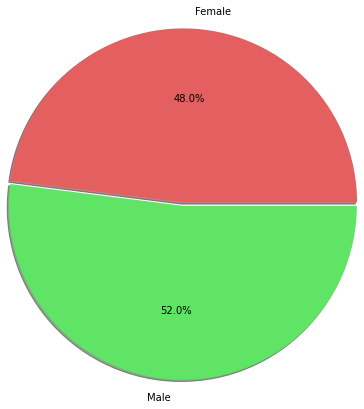

In [3]:
# Using entries_gender DataFrame
entries_genders.loc['TotalColumn'] = entries_genders.sum()

# creating specifc dataframe
df_gender = entries_genders.loc['TotalColumn']
del df_gender['Discipline']
del df_gender['Total']

# customize plot
explode = (0.04, 0)
labels = ['Female', 'Male']
colors = ['#E46060', '#60E466']
plt.pie(df_gender, explode=explode, labels=labels, shadow=True, autopct='%1.1f%%', colors=colors, radius=2)
plt.show()

In [4]:
# building next analysis datasets
df_gender_by_discipline = entries_genders

if 'Total' in df_gender_by_discipline.columns:
    del df_gender_by_discipline['Total']

if 'TotalColumn' in df_gender_by_discipline.index:
    df_gender_by_discipline.drop('TotalColumn', inplace=True)

colorsForDisciplines = []
for discipline in df_gender_by_discipline['Discipline']:
    colorsForDisciplines.append("#%06x" % random.randint(0, 0xFFFFFF))

## Female by discipline

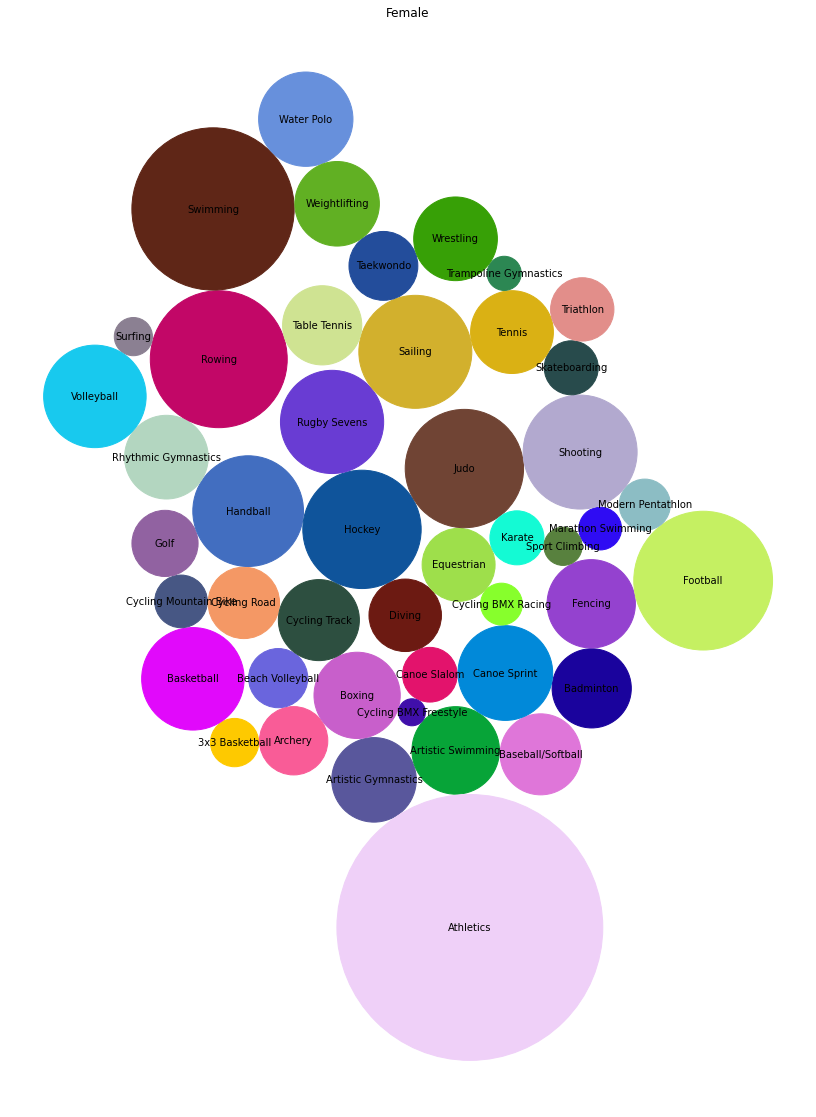

In [5]:
chart = bubble_chart(area=df_gender_by_discipline['Female'],
                           bubble_spacing=0.1)
chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(20, 20))
chart.plot(
    ax, df_gender_by_discipline['Discipline'], colorsForDisciplines)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Female')

plt.show()

del chart

## Male by discipline

Text(0.5, 1.0, 'Male')

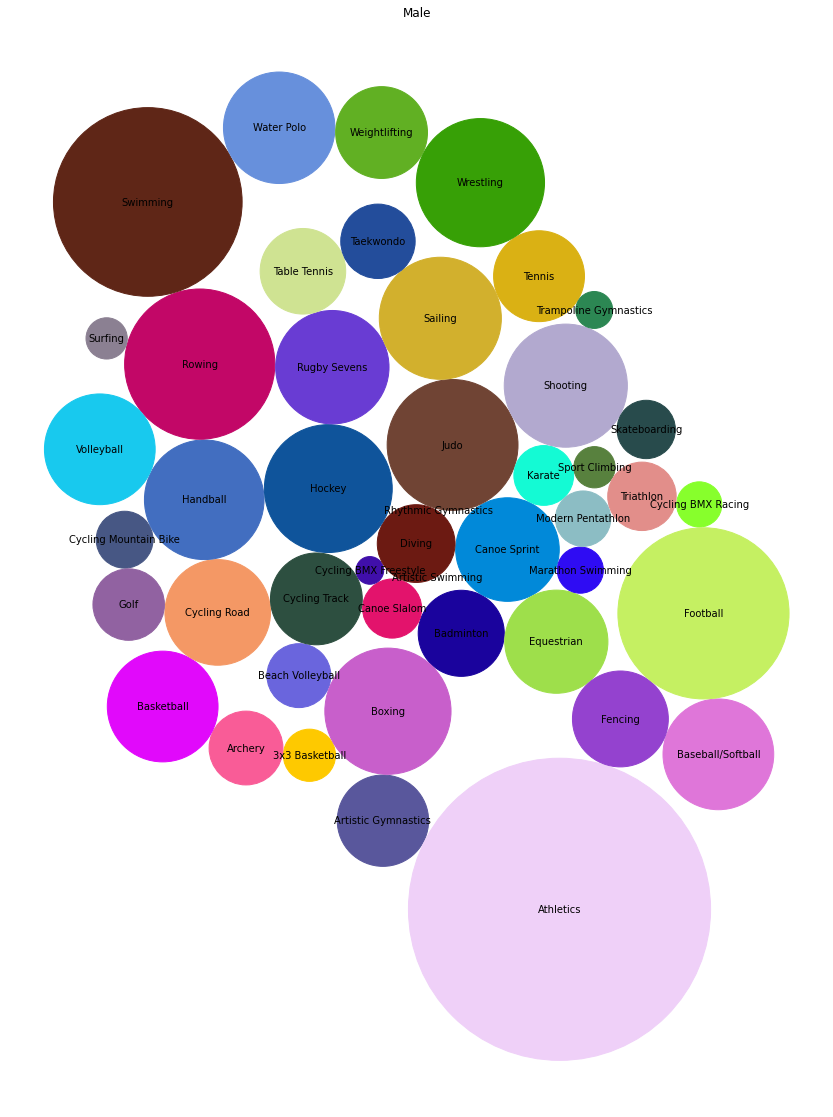

In [6]:
chart = bubble_chart(area=df_gender_by_discipline['Male'],
                           bubble_spacing=0.1)
chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(20, 20))
chart.plot(
    ax, df_gender_by_discipline['Discipline'], colorsForDisciplines)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Male')

## Discipline by gender

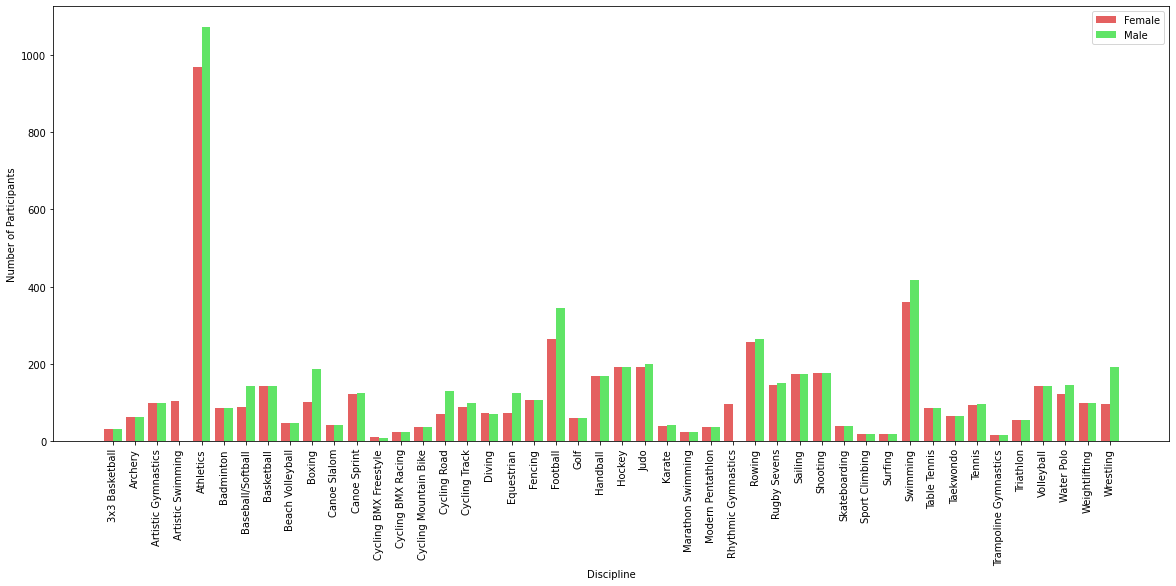

In [7]:
Disc = df_gender_by_discipline.groupby('Discipline')
x = [Discipline for Discipline, df in Disc]
plt.figure(figsize=(20,8))
X_axis = np.arange(len(df_gender_by_discipline['Discipline']))
plt.bar(X_axis - 0.2, df_gender_by_discipline['Female'], 0.4, label = 'Female', color='#E46060')
plt.bar(X_axis + 0.2, df_gender_by_discipline['Male'], 0.4, label = 'Male', color='#60E466')
plt.xlabel("Discipline",size=10)
plt.ylabel("Number of Participants")
plt.xticks(X_axis,x,rotation='vertical')
plt.legend()
plt.show()
